# 3 Final Project Submission
* name: Leticia D Drasler (Fernandes)
* pace: Part time
* Scheduled project review data/time: November 16th, 2021, 08:30 AM (Mountain Time)
* Course Instructor: Abhineet
* Blog post URL:
* GitHub repository:

In [106]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Importing and undarstanding Data

In [107]:
df_values = pd.read_csv('training_set_values.csv', index_col='id')
df_labels = pd.read_csv('training_set_labels.csv', index_col='id')

df_values.head()

amount_tsh date_recorded        funder  gps_height     installer  \
id                                                                        
69572      6000.0    2011-03-14         Roman        1390         Roman   
8776          0.0    2013-03-06       Grumeti        1399       GRUMETI   
34310        25.0    2013-02-25  Lottery Club         686  World vision   
67743         0.0    2013-01-28        Unicef         263        UNICEF   
19728         0.0    2011-07-13   Action In A           0       Artisan   

       longitude   latitude              wpt_name  num_private  \
id                                                               
69572  34.938093  -9.856322                  none            0   
8776   34.698766  -2.147466              Zahanati            0   
34310  37.460664  -3.821329           Kwa Mahundi            0   
67743  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
19728  31.130847  -1.825359               Shuleni            0   

                         basin  ... payment_type water_quality  quality_group  \
id                              ...                                             
69572               Lake Nyasa  ...     annually          soft           good   
8776             Lake Victoria  ...    never pay          soft           good   
34310                  Pangani  ...   per bucket          soft           good   
67743  Ruvuma / Southern Coast  ...    never pay          soft           good   
19728            Lake Victoria  ...    never pay          soft           good   

           quantity quantity_group                source  \
id                                                         
69572        enough         enough                spring   
8776   insufficient   insufficient  rainwater harvesting   
34310        enough         enough                   dam   
67743           dry            dry           machine dbh   
19728      seasonal       seasonal  rainwater harvesting   

                source_type source_class              waterpoint_type  \
id                                                                      
69572                spring  groundwater           communal standpipe   
8776   rainwater harvesting      surface           communal standpipe   
34310                   dam      surface  communal standpipe multiple   
67743              borehole  groundwater  communal standpipe multiple   
19728  rainwater harvesting      surface           communal standpipe   

      waterpoint_type_group  
id                           
69572    communal standpipe  
8776     communal standpipe  
34310    communal standpipe  
67743    communal standpipe  
19728    communal standpipe  

[5 rows x 39 columns]

In [108]:
df_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [109]:
list(df_values.columns.values)

['amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [110]:
df_labels.head(5)

status_group
id                   
69572      functional
8776       functional
34310      functional
67743  non functional
19728      functional

In [111]:
df_labels.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Plotting variables to have a better undarstading and visualization

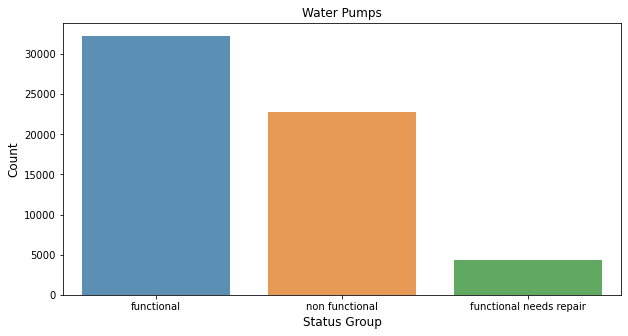

In [115]:
func_pump = df_labels['status_group'].value_counts()
func_pump = func_pump[:100,]
plt.figure(figsize=(10,5))
sns.barplot(func_pump.index, func_pump.values, alpha=0.8)
plt.title('Water Pumps')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Status Group', fontsize=12)
plt.show()

In [116]:
#import folium
#df_sample=df_train[df_train.target==0].sample(100)
#points = zip(df_sample.latitude,df_sample.longitude)

#lat = df_train.latitude.mean()
#long = df_train.longitude.mean()
#base_map = folium.Map([lat, long], zoom_start=8)
#for p in points:
#    lat = p[0]
#    long = p[1]
#    marker = folium.Marker(location=[lat, long])
#    marker.add_to(base_map)
#base_map

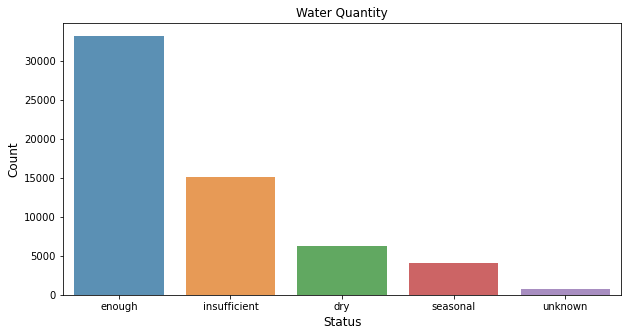

In [117]:
quantity = df_values['quantity'].value_counts()
quantity = quantity[:100,]
plt.figure(figsize=(10,5))
sns.barplot(quantity.index, quantity.values, alpha=0.8)
plt.title('Water Quantity')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Status', fontsize=12)
plt.show()

## Joing the two dataset, values and labels.

In [118]:
df_training = pd.concat([df_labels, df_values], axis=1, join='inner')
df_training.head()

status_group  amount_tsh date_recorded        funder  gps_height  \
id                                                                          
69572      functional      6000.0    2011-03-14         Roman        1390   
8776       functional         0.0    2013-03-06       Grumeti        1399   
34310      functional        25.0    2013-02-25  Lottery Club         686   
67743  non functional         0.0    2013-01-28        Unicef         263   
19728      functional         0.0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name  num_private  \
id                                                                             
69572         Roman  34.938093  -9.856322                  none            0   
8776        GRUMETI  34.698766  -2.147466              Zahanati            0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi            0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
19728       Artisan  31.130847  -1.825359               Shuleni            0   

       ... payment_type water_quality quality_group      quantity  \
id     ...                                                          
69572  ...     annually          soft          good        enough   
8776   ...    never pay          soft          good  insufficient   
34310  ...   per bucket          soft          good        enough   
67743  ...    never pay          soft          good           dry   
19728  ...    never pay          soft          good      seasonal   

       quantity_group                source           source_type  \
id                                                                  
69572          enough                spring                spring   
8776     insufficient  rainwater harvesting  rainwater harvesting   
34310          enough                   dam                   dam   
67743             dry           machine dbh              borehole   
19728        seasonal  rainwater harvesting  rainwater harvesting   

       source_class              waterpoint_type waterpoint_type_group  
id                                                                      
69572   groundwater           communal standpipe    communal standpipe  
8776        surface           communal standpipe    communal standpipe  
34310       surface  communal standpipe multiple    communal standpipe  
67743   groundwater  communal standpipe multiple    communal standpipe  
19728       surface           communal standpipe    communal standpipe  

[5 rows x 40 columns]

# Filling NaN and Dropping Columns

In [119]:
to_drop =['num_private','date_recorded','longitude','latitude','subvillage',
          'region_code','district_code','lga','ward','recorded_by',
          'scheme_management','scheme_name', 'extraction_type_group','extraction_type_class',
         'management_group','payment','quality_group','quantity_group',
          'source_type', 'source_class','waterpoint_type_group','wpt_name']
df_training.drop(to_drop,axis=1, inplace=True)

In [120]:
df_training.public_meeting.fillna(False,inplace=True)

In [121]:
df_training.permit.fillna(False,inplace=True)

# Transforming and Binning values
* Funder
* Installer
* Construction Year
* Extraction
* Management
* Population

In [122]:
funder_bins=list(df_training.funder.value_counts().index[:8])
funder_bins

['Government Of Tanzania',
 'Danida',
 'Hesawa',
 'Rwssp',
 'World Bank',
 'Kkkt',
 'World Vision',
 'Unicef']

In [123]:
funder_dict=dict(zip(funder_bins,range(1,len(funder_bins)+1)))
funder_dict

{'Government Of Tanzania': 1,
 'Danida': 2,
 'Hesawa': 3,
 'Rwssp': 4,
 'World Bank': 5,
 'Kkkt': 6,
 'World Vision': 7,
 'Unicef': 8}

In [124]:
df_training['funder']=df_training['funder'].apply(
    lambda x: funder_dict[x] if x in funder_bins else 0
)

In [125]:
installers=list(df_training.installer.value_counts()[:10].index)
installers.remove('0')
installers_dict = dict(zip(installers,range(1,len(installers)+1)))
df_training['installer']=df_training['installer'].apply(
    lambda x: installers_dict[x] if x in installers else 0
)

In [126]:
management=list(df_training.management.value_counts()[:4].index)
management_dict = dict(zip(management,range(1,len(management)+1)))
df_training['management']=df_training['management'].apply(
    lambda x: management_dict[x] if x in management else 0
)

In [127]:
max_year=df_training['construction_year'].describe()['max']
max_year = float(max_year)
min_year=df_training['construction_year'][df_training[
    'construction_year']!=0].sort_values(ascending=True).iloc[0]
min_year = float(min_year)
year_bins=np.linspace(min_year,max_year,7)
year_bins=[np.round(x) for x in year_bins ]
year_bins=[0,1]+year_bins[1:]
year_bins

[0, 1, 1969.0, 1978.0, 1986.0, 1995.0, 2004.0, 2013.0]

In [128]:
df_training['construction_year']=pd.cut(df_training['construction_year'],[
    0,1,1960,1969,1978,1987,1995,2004,2013
],include_lowest=True,labels=[1,2,3,4,5,6,7,8])

In [129]:
extractions=list(df_training.extraction_type.value_counts()[0:4].index)
extractions.remove('other')
extractions_dict = dict(zip(extractions,range(1,len(extractions)+1)))
extractions_dict

{'gravity': 1, 'nira/tanira': 2, 'submersible': 3}

In [130]:
df_training['extraction_type']=df_training['extraction_type'].apply(
    lambda x: extractions_dict[x] if x in extractions else 0
)

In [131]:
df_training.population=df_training.population.apply(
    lambda x: 1 if x>1 else 0
)

In [132]:
df_training.management.value_counts()

1    40507
0     6910
2     6515
3     2933
4     2535
Name: management, dtype: int64

### Creating Target Y and Predictor X

In [137]:
categoricals=['funder','installer','management','public_meeting',
              'construction_year','extraction_type','permit','basin',
              'region','population','water_quality','quantity','source',
              'waterpoint_type','payment_type'
             ]

In [138]:
status_map={'non functional':0,'functional':1,'functional needs repair':2}
y=df_training['status_group'].replace(status_map)
X=df_training.drop('status_group',axis=1)

In [139]:
X=pd.get_dummies(X,columns=categoricals,drop_first=True)

In [140]:
X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size = 0.25, random_state=42)

### Modeling - DecisionTree

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
clf = DecisionTreeClassifier(max_depth=13)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13)

In [146]:
clf.decision_path(X_test)

<14850x3197 sparse matrix of type '<class 'numpy.int64'>'
	with 204235 stored elements in Compressed Sparse Row format>

In [147]:
clf.feature_importances_

array([3.75361920e-02, 9.24808384e-02, 1.45356535e-02, 1.47309548e-03,
       2.43669646e-03, 1.86854603e-03, 3.68928791e-03, 1.14653050e-03,
       2.38153888e-03, 1.66041828e-03, 1.70122084e-02, 5.15186402e-03,
       1.04459106e-02, 2.12926257e-04, 2.96550019e-04, 1.80252399e-04,
       1.74066590e-03, 1.75576783e-03, 4.57393804e-04, 1.00268272e-02,
       2.26959580e-03, 5.00532022e-03, 2.03173506e-03, 1.02148040e-02,
       1.15710031e-04, 8.09005460e-04, 5.02892215e-03, 6.75196657e-03,
       3.26361087e-03, 7.66678667e-03, 1.64377454e-02, 2.12386091e-02,
       6.69913919e-03, 6.49923561e-03, 1.17886520e-02, 3.94294453e-03,
       5.31290169e-03, 5.15540076e-03, 1.10170582e-02, 5.69542768e-03,
       1.41833513e-03, 1.32167274e-03, 4.48096111e-03, 6.18242611e-04,
       6.45091814e-03, 4.74209735e-03, 2.18704475e-03, 1.05745253e-02,
       5.61318072e-03, 7.92565828e-04, 1.54479095e-03, 1.82040201e-03,
       2.72340248e-03, 5.57718425e-03, 2.65397597e-03, 3.96607054e-03,
      

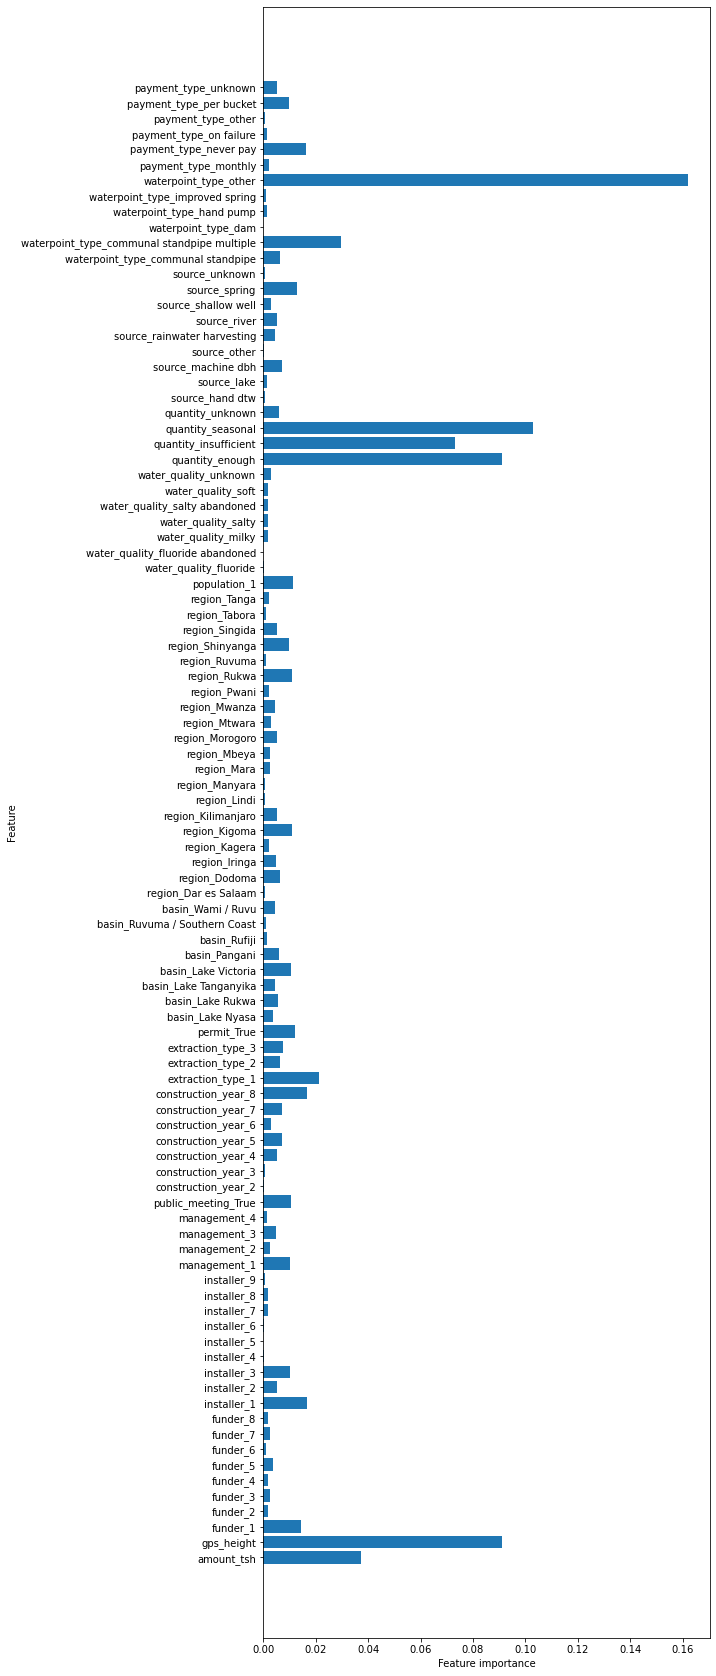

In [36]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,30))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

In [37]:
y_preds=clf.predict(X_test)

In [38]:
accuracy_score(y_test,y_preds)

0.7597979797979798

In [148]:
confusion_matrix(y_test,y_preds)

array([[3705, 1894,   79],
       [ 611, 7354,  133],
       [ 150,  700,  224]], dtype=int64)

In [150]:
from sklearn.metrics import roc_curve, auc

# Identify the optimal tree depth for given data

max_depth = range(1,32)
roc_train = []
roc_test = []
accuracy_scores_train=[]
accuracy_scores_test=[]
for test_parm in max_depth:
    dt = DecisionTreeClassifier(random_state=10,max_depth=test_parm)
    dt.fit(X_train, y_train)
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)
    accuracy_scores_train.append((test_parm,accuracy_score(y_pred_train,y_train)))
    accuracy_scores_test.append((test_parm,accuracy_score(y_pred_test,y_test)))


In [151]:
accuracy_scores_train

[(1, 0.6168125701459035),
 (2, 0.6201122334455668),
 (3, 0.6780246913580247),
 (4, 0.7053872053872053),
 (5, 0.7180920314253647),
 (6, 0.7256341189674523),
 (7, 0.7344781144781145),
 (8, 0.7453423120089787),
 (9, 0.7536026936026936),
 (10, 0.7635914702581369),
 (11, 0.7753535353535354),
 (12, 0.7889786756453423),
 (13, 0.800695847362514),
 (14, 0.8149943883277216),
 (15, 0.8282379349046016),
 (16, 0.8404264870931537),
 (17, 0.8523456790123457),
 (18, 0.8637037037037038),
 (19, 0.874769921436588),
 (20, 0.8837037037037037),
 (21, 0.8925028058361392),
 (22, 0.899753086419753),
 (23, 0.9059708193041527),
 (24, 0.9111560044893379),
 (25, 0.915712682379349),
 (26, 0.9202693602693602),
 (27, 0.923658810325477),
 (28, 0.9269809203142536),
 (29, 0.9297643097643098),
 (30, 0.9320763187429854),
 (31, 0.9336026936026937)]

In [152]:
accuracy_scores_test

[(1, 0.6186531986531987),
 (2, 0.616902356902357),
 (3, 0.6715824915824916),
 (4, 0.7034343434343434),
 (5, 0.7122558922558923),
 (6, 0.7195286195286196),
 (7, 0.7260606060606061),
 (8, 0.7342760942760943),
 (9, 0.7406734006734007),
 (10, 0.7444444444444445),
 (11, 0.7506397306397307),
 (12, 0.7562962962962962),
 (13, 0.7608754208754209),
 (14, 0.7628956228956228),
 (15, 0.7633670033670034),
 (16, 0.7616161616161616),
 (17, 0.7624242424242424),
 (18, 0.7638383838383839),
 (19, 0.7607407407407407),
 (20, 0.7639057239057239),
 (21, 0.7596632996632997),
 (22, 0.7575757575757576),
 (23, 0.7564983164983164),
 (24, 0.7574410774410775),
 (25, 0.7551515151515151),
 (26, 0.7534680134680135),
 (27, 0.7530639730639731),
 (28, 0.7502356902356903),
 (29, 0.74996632996633),
 (30, 0.75010101010101),
 (31, 0.7489562289562289)]

(1.0, 30.0)

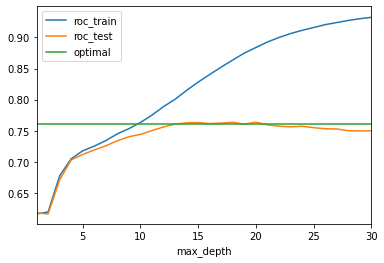

In [153]:
# Identify the optimal tree depth for given data

roc_train=[x[1] for x in accuracy_scores_train]
roc_test=[x[1] for x in accuracy_scores_test]
df_result=pd.DataFrame({'roc_train':roc_train,'roc_test':
                        roc_test,'max_depth':list(max_depth)})
df_result=df_result.set_index('max_depth')
df_result['optimal']=pd.Series(index=list(max_depth), data=np.ones(len(
    max_depth))*df_result.roc_test.iloc[15])

df_result.plot()
plt.xlim([1, 30])

In [154]:
df_result.iloc[15]

roc_train    0.840426
roc_test     0.761616
optimal      0.761616
Name: 16, dtype: float64

### BaggingClassifier and RandomForest

In [164]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(
    criterion='gini', max_depth=15), n_estimators=20)

In [160]:
bagged_tree.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15),
                  n_estimators=20)

In [161]:
bagged_tree.score(X_train,y_train)

0.8429629629629629

In [162]:
bagged_tree.score(X_test,y_test)

0.7796632996632996

In [168]:
#do randomforest here

#ACCURACY SCORE

In [169]:
accuracy_scores_train={}
accuracy_scores_test={}
max_depth=range(1,20)
for test_parm in max_depth:
    dt = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=test_parm), n_estimators=20)
    dt.fit(X_train, y_train)
    accuracy_scores_train[test_parm]=dt.score(X_train,y_train)
    accuracy_scores_test[test_parm]=dt.score(X_test,y_test)

In [50]:
accuracy_scores_train

{1: 0.6168125701459035,
 2: 0.6201122334455668,
 3: 0.6780246913580247,
 4: 0.7054096520763188,
 5: 0.7199551066217733,
 6: 0.729023569023569,
 7: 0.7403367003367003,
 8: 0.7498765432098765,
 9: 0.760628507295174,
 10: 0.7725028058361392,
 11: 0.7875645342312009,
 12: 0.8032547699214366,
 13: 0.8195061728395062,
 14: 0.8308417508417508,
 15: 0.8443771043771043,
 16: 0.8538271604938271,
 17: 0.8660381593714928,
 18: 0.8776879910213243,
 19: 0.8864421997755331}

<AxesSubplot:>

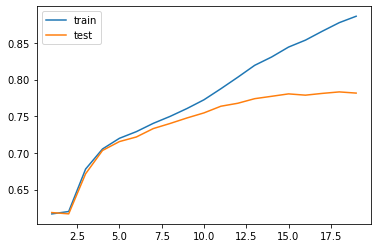

In [51]:
df_test=pd.DataFrame(accuracy_scores_test.values(),index=accuracy_scores_test.keys(),columns=['test'])
df_train=pd.DataFrame(accuracy_scores_train.values(),index=accuracy_scores_train.keys(),columns=['train'])
df_train.join(df_test).plot()

In [ ]:
#from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_test = bagged_tree.predict(X_test)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      5678
           1       0.76      0.92      0.83      8098
           2       0.54      0.21      0.30      1074

    accuracy                           0.78     14850
   macro avg       0.71      0.61      0.63     14850
weighted avg       0.78      0.78      0.76     14850

[[3916 1691   71]
 [ 553 7423  122]
 [ 147  701  226]]


In [53]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=900)
tree.plot_tree(clf,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [54]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)
gbt_clf = GradientBoostingClassifier(random_state=42)
adaboost_clf.fit(X_train,y_train)
gbt_clf.fit(X_train,y_train)


GradientBoostingClassifier(random_state=42)

In [55]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [56]:
accuracy_score(y_test,gbt_clf_test_preds)

0.7490909090909091

In [166]:
#XGBOOST

In [170]:
from xgboost import XGBClassifier

In [59]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

[20:56:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [60]:
training_accuracy,test_accuracy

(0.8182042648709316, 0.7851851851851852)

In [61]:


param_grid = {
    'learning_rate': [0.02, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 1],
    'n_estimators': [100],
}

param_grid_2 = {
    'learning_rate': [0.2, 0.3],
    'max_depth': [6],
    'min_child_weight': [1],
    'subsample': [0.5],
    'n_estimators': [100],
}

In [62]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(clf, param_grid_2, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

[20:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                                     tree

In [63]:
best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)


Grid Search found the following optimal parameters: 
learning_rate: 0.3
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.5


In [64]:
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

In [65]:
training_accuracy,test_accuracy

(0.8185634118967452, 0.7847811447811448)